In [1]:
import braintracer.file_management as btf
import braintracer.analysis as bt
import braintracer.plotting as btp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
bt.debug = False # False by default
bt.grouped = True # True by default, set to False if you only have one group
bt.starter_region = 'IO' # You must set a starter region to use some features
bt.starter_ch1 = True # True - starter cells (postsynaptics) in ch1; False - ch2; None - sum both channels
bt.fluorescence = True

In [3]:
bt.Dataset('SC014', 'LV', 'r', 'b', fluorescence=True, fluorescence_parameters=True);
bt.Dataset('SC013', 'LS', 'r', 'b', fluorescence=True);
#bt.Dataset('SC014', 'LV', 'r', 'b', fluorescence=True);
bt.Dataset('SC015', 'LS', 'r', 'b', fluorescence=True, fluorescence_parameters=True);
bt.Dataset('SC020', 'LS', 'r', 'b', fluorescence=True, fluorescence_parameters=True);
bt.Dataset('SC022', 'LS', 'r', 'b', fluorescence=True, fluorescence_parameters=True); # hit basically both lobules
bt.Dataset('SC023', 'LV', 'r', 'b', fluorescence=True, fluorescence_parameters=True);
#bt.Dataset('SC023', 'LV', 'r', 'b', fluorescence=True);

Failed to open saved fluorescence data for SC014. Analysing fluorescence...
(1300, 800, 1125)


AssertionError: Please provide transformed stack at F:\SC014\transform\*

In [4]:
parent, children = bt.children_from('CB', depth=0)
children = np.array(children)
children = np.append(children, [512, 8, 1009, 960, 728]) # big areas
children = np.append(children, [567, 695, 315]) # duplicate cerebral cortex regions
children = np.append(children, [343, 1065]) # remove areas that inherit everything, e.g. brainstem
children = np.append(children, [73, 145, 153]) # remove ventricles

Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
967 [792, 932, 697]
1129 [549, 856, 864, 637, 629]
313 [323, 339, 4, 828]
688 [1089, 698, 822, 453, 669, 961, 909, 843, 378, 425, 385, 873, 750, 593]
623 [477]
752 [1123, 78, 326, 553]
354 [370, 386, 1048, 83, 372, 136, 235, 203, 852, 701, 903, 437, 955, 209, 202, 217]
771 [1117, 987, 1132, 621, 931, 574, 867, 7]


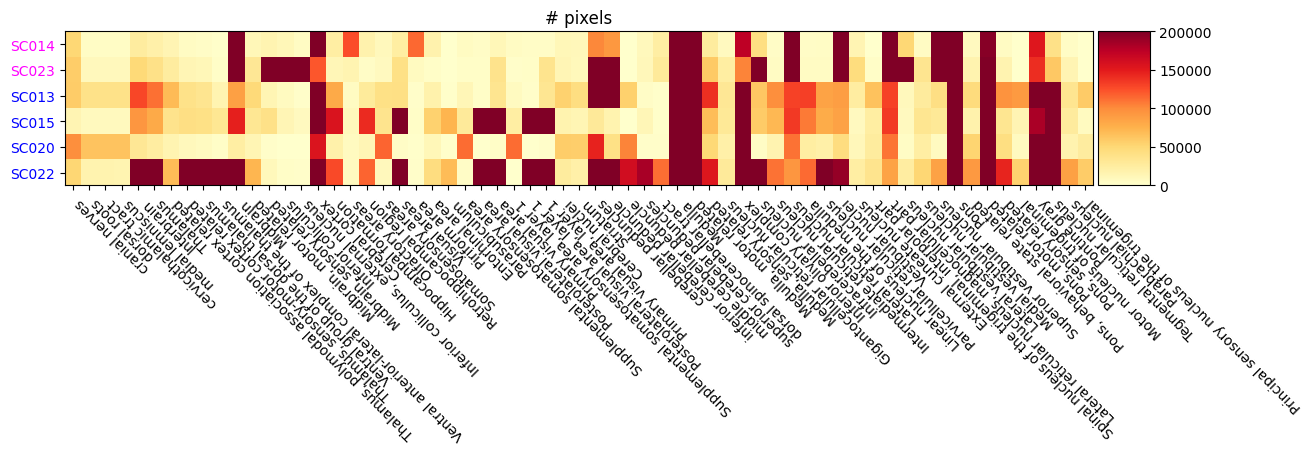

In [5]:
btp.generate_matrix_plot(threshold=20_000, ignore=children, vbounds=(0,200_000), zscore=False, cmap='YlOrRd', figsize=(14,2), aspect='auto')
btf.save('flr_matrix_selection_fixed', as_type='pdf')

In [8]:
btp.generate_matrix_plot(threshold=20_000, ignore=children, vbounds=(0,200_000), normalisation='ch1', zscore=False, cmap='YlOrRd', figsize=(14,2), aspect='auto')

IndexError: index 0 is out of bounds for axis 0 with size 0

Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
967 [901, 229, 794]
1129 [549, 856, 864, 637, 629]
313 [323, 339, 4, 828]
688 [1089, 698, 822, 453, 669, 961, 909, 378, 425, 385, 750, 593]
623 [477]
752 [1123, 78, 326, 553]
354 [370, 386, 1048, 83, 372, 136, 235, 203, 852, 701, 903, 955, 209, 202, 217]
771 [1117, 987, 1132, 621, 931, 574, 867]


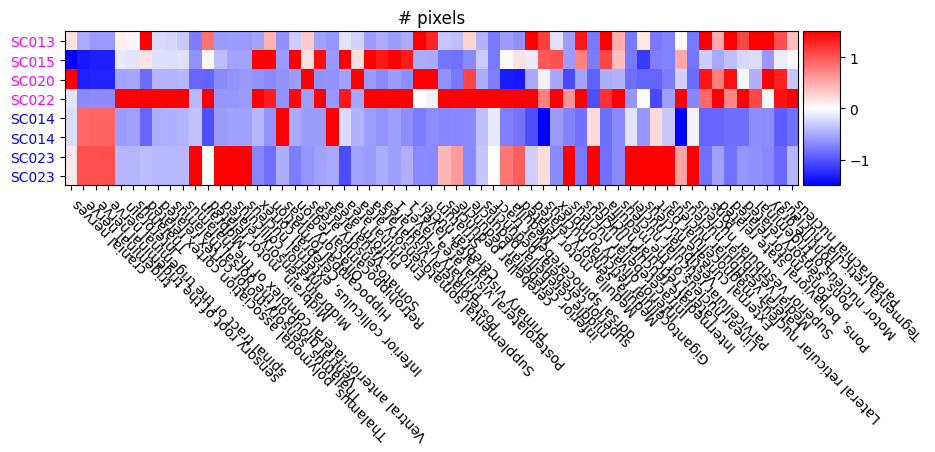

In [5]:
btp.generate_matrix_plot(threshold=20_000, ignore=children, vbounds=(-1.5,1.5), zscore=True, cmap='bwr', figsize=(10,2), aspect='auto')
btf.save('flr_matrix_zscore_fixed', as_type='png')

Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None


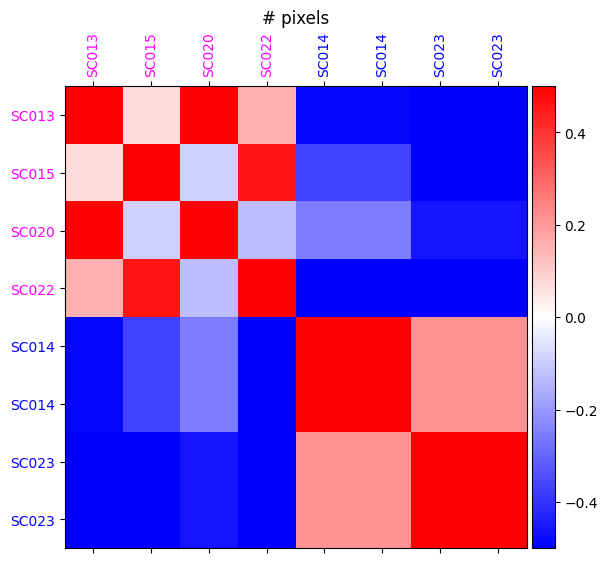

In [6]:
btp.generate_matrix_plot(threshold=20_000, ignore=children, vbounds=(-0.5,0.5), covmat=True, sort=False, rowvar=1, zscore=True, cmap='bwr')
btf.save('flr_matrix _corr_fixed', as_type='png')

Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None


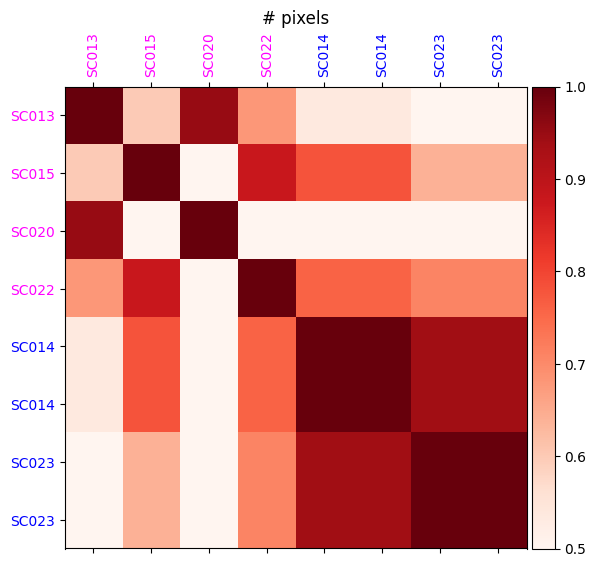

In [12]:
btp.generate_matrix_plot(threshold=20_000, ignore=children, vbounds=(0.5,1), covmat=True, sort=False, rowvar=1, zscore=False, cmap='Reds')
btf.save('flr_matrix _corr_orig_fixed', as_type='png')

In [ ]:
### reward = ['ORB','VTA','STRv','SNc','ACB','CS','ACA','BLA','CEA','LHA']
df = btp.generate_custom_plot(reward, title='Reward areas', normalisation='ch1')

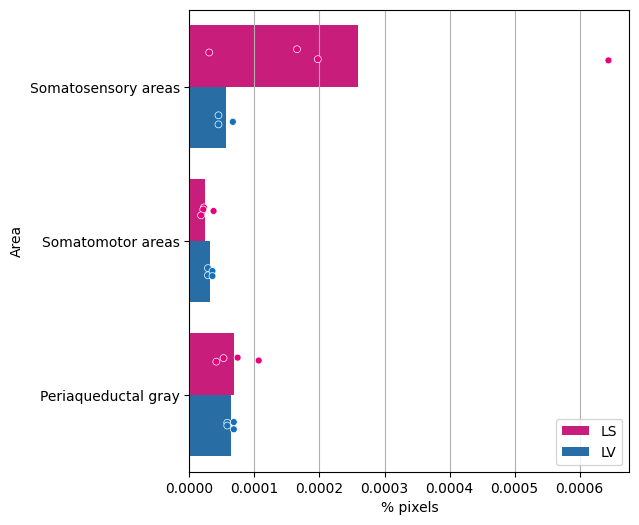

In [9]:
plot1 = ['SS','MO','PAG',]
btp.generate_custom_plot(plot1, title='', normalisation='ch1')
#btf.save(f'differences_{title}', as_type='png')

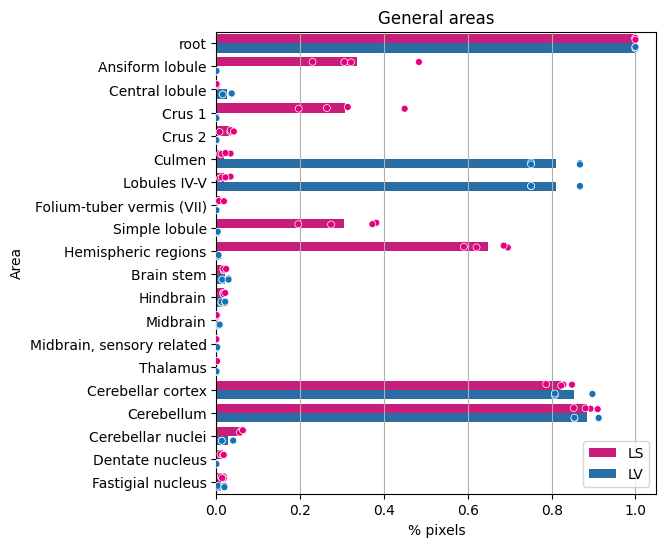

In [10]:
areas = ['root','Ansiform lobule','Central lobule','Crus 1','Crus 2','Culmen','Lobules IV-V','Folium-tuber vermis (VII)','Simple lobule','Hemispheric regions','Brain stem','Hindbrain','Midbrain','Midbrain, sensory related','Thalamus','Cerebellar cortex','Cerebellum','Cerebellar nuclei','Dentate nucleus','Fastigial nucleus']
btp.generate_custom_plot(areas, title='General areas', normalisation='ch1', flr_log=True)
btf.save('Flr_Normalisations_fixed', as_type='png')

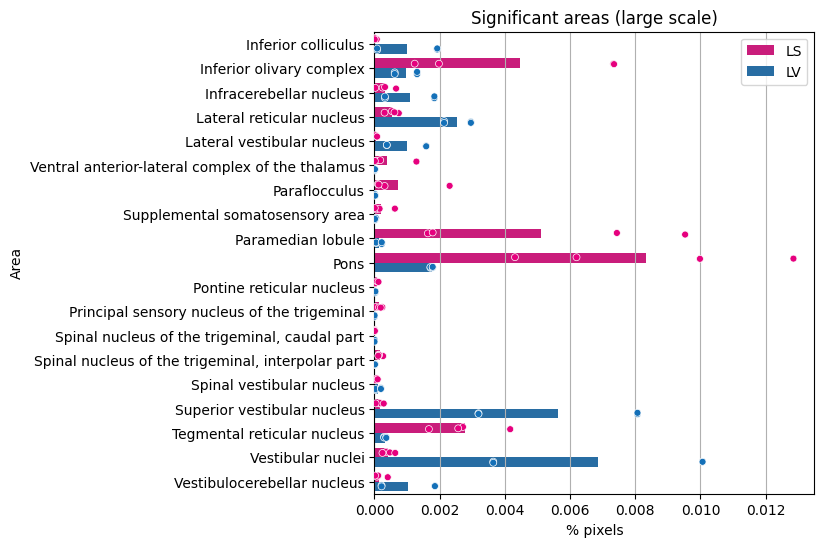

In [11]:
areas = ['IC','IO','ICB','LRN','LAV','VAL','PFL','SSs','PRM','P','PRNr','PSV','SPVC','SPVI','SPIV','SUV','TRN','VNC','VeCB']
btp.generate_custom_plot(areas, title='Significant areas (large scale)', normalisation='ch1', flr_log=False)
btf.save('Flr_Large_Areas_fixed', as_type='png')

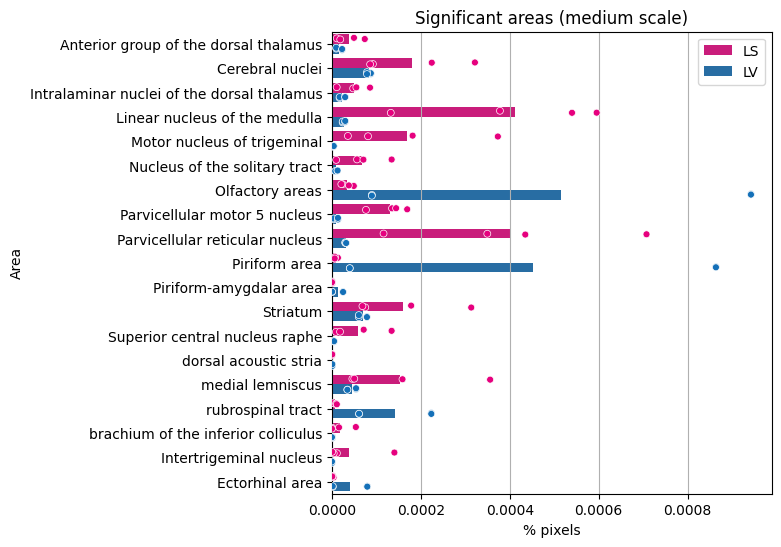

In [15]:
areas = ['ATN','CNU','ILM','LIN','V','NTS','OLF','PC5','PARN','PIR','PAA','STR','CS','das','ml','rust','bic','I5','ECT']
btp.generate_custom_plot(areas, title='Significant areas (medium scale)', normalisation='ch1', flr_log=False)
btf.save('Flr_Med_Areas_fixed', as_type='png')

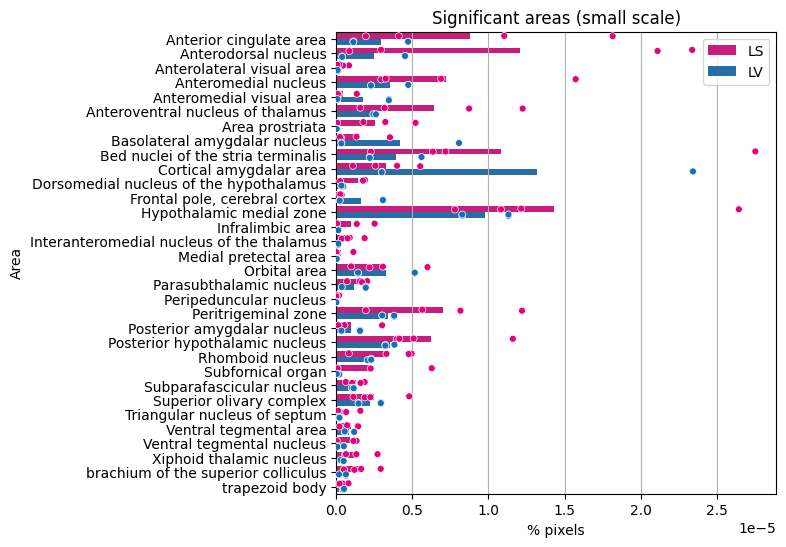

In [16]:
areas = ['ACA','AD','VISal','AM','VISam','AV','APr','BLA','BST','COA','DMH','FRP','MEZ','ILA','IAM','MPT','ORB','PSTN','PP','P5','PA','PH','RH','SFO','SPF','SOC','TRS','VTA','VTN','Xi','bsc','tb']
btp.generate_custom_plot(areas, title='Significant areas (small scale)', normalisation='ch1', flr_log=False)
btf.save('Flr_Small_Areas_fixed', as_type='png')

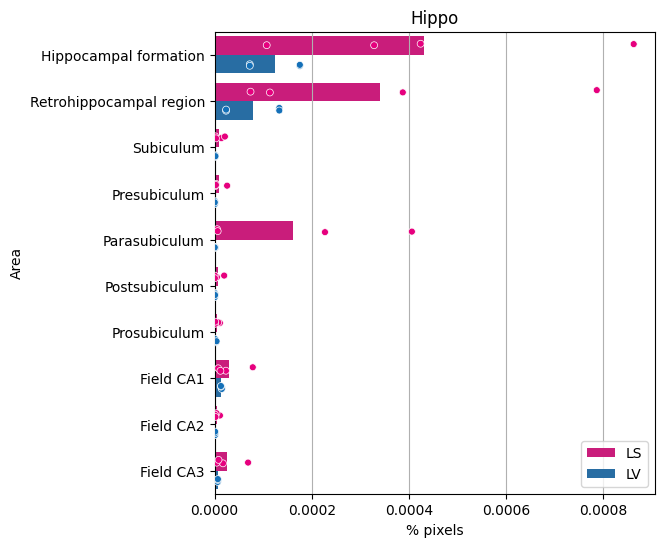

In [18]:
areas = ['HPF','RHP','SUB','PRE','PAR','POST','ProS','CA1','CA2','CA3']
btp.generate_custom_plot(areas, title='Hippo', normalisation='ch1', flr_log=True)
btf.save('Flr_Hippo_fixed', as_type='png')

Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None
Normalisation set to presynaptics, defaulting to None


C:\Users\Sam\miniconda3\envs\bt\lib\site-packages\braintracer\plotting.py:596: RuntimeWarning: divide by zero encountered in log
  area_values = list(map(lambda x: np.log(x), area_values))
C:\Users\Sam\miniconda3\envs\bt\lib\site-packages\braintracer\plotting.py:596: RuntimeWarning: divide by zero encountered in log
  area_values = list(map(lambda x: np.log(x), area_values))
C:\Users\Sam\miniconda3\envs\bt\lib\site-packages\braintracer\plotting.py:596: RuntimeWarning: divide by zero encountered in log
  area_values = list(map(lambda x: np.log(x), area_values))
C:\Users\Sam\miniconda3\envs\bt\lib\site-packages\braintracer\plotting.py:596: RuntimeWarning: divide by zero encountered in log
  area_values = list(map(lambda x: np.log(x), area_values))
C:\Users\Sam\miniconda3\envs\bt\lib\site-packages\braintracer\plotting.py:596: RuntimeWarning: divide by zero encountered in log
  area_values = list(map(lambda x: np.log(x), area_values))
C:\Users\Sam\miniconda3\envs\bt\lib\site-packages\brain

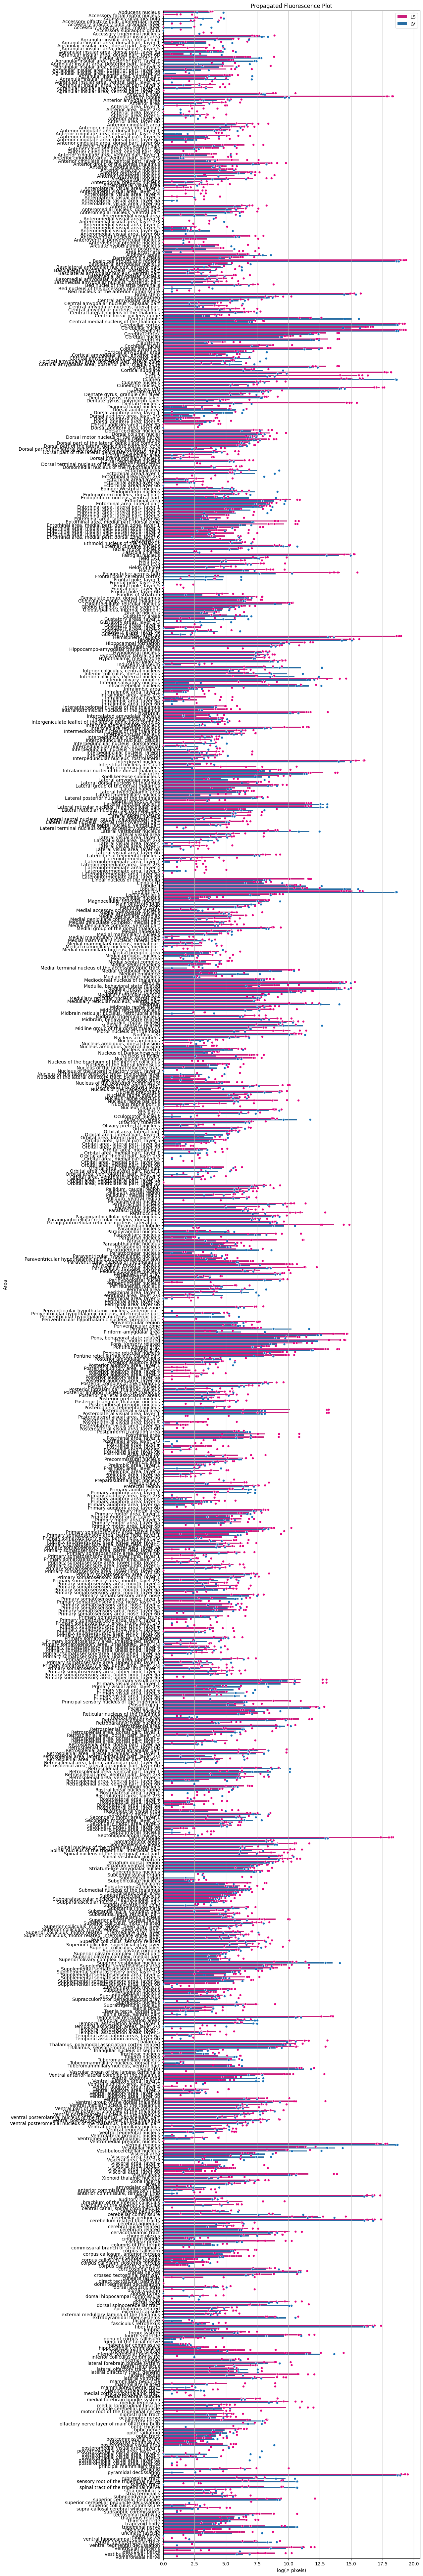

In [19]:
btp.generate_whole_fluorescence_plot()
btf.save('anterograde_overview_fixed', as_type='png')

## Dopaminergic inputs

In [1]:
import braintracer.file_management as btf
import braintracer.analysis as bt
import braintracer.plotting as btp
import matplotlib.pyplot as plt
import numpy as np

embedWindow(verbose=True): could not load ipyvtklink try:
> pip install ipyvtklink


In [2]:
bt.debug = False # False by default
bt.grouped = False # True by default, set to False if you only have one group
bt.starter_region = 'IO' # You must set a starter region to use some features
bt.starter_ch1 = True # True - starter cells (postsynaptics) in ch1; False - ch2; None - sum both channels
bt.fluorescence = True
plt.style.use('seaborn-poster')

C:\Users\Sam\AppData\Local\Temp\ipykernel_5224\3786088003.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [3]:
bt.Dataset('SC026', 'DA', 'r', 'b', fluorescence=True);
bt.Dataset('SC032', 'DA', 'r', 'b', fluorescence=True);
bt.Dataset('SC033', 'DA', 'r', 'b', fluorescence=True);

Successfully opened saved fluorescence data for SC026
Successfully opened saved fluorescence data for SC032
Successfully opened saved fluorescence data for SC033


In [5]:
bt.datasets[0].project_olive((350, 380))
bt.datasets[1].project_olive((230, 265))
bt.datasets[1].project_olive((262, 300))

  0%|          | 0/30 [00:00<?, ?it/s]

(3372, 4956) int32


  0%|          | 0/35 [00:00<?, ?it/s]

(3417, 4956) int32


  0%|          | 0/38 [00:00<?, ?it/s]

(3417, 4956) int32


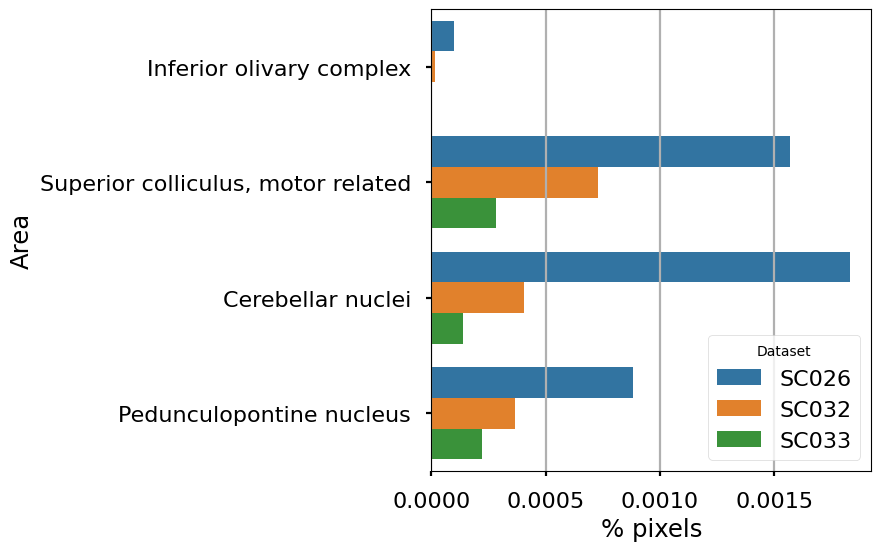

In [7]:
btp.generate_custom_plot(['IO','SCm','CBN','PPN'], title='', normalisation='ch1')
btf.save('DA_projections_plot', as_type='png')

## Fluorescence projections

In [1]:
import braintracer.file_management as btf
import braintracer.analysis as bt
import braintracer.plotting as btp
import matplotlib.pyplot as plt
import numpy as np

embedWindow(verbose=True): could not load ipyvtklink try:
> pip install ipyvtklink


In [2]:
bt.debug = False # False by default
bt.grouped = False # True by default, set to False if you only have one group
bt.starter_region = 'IO' # You must set a starter region to use some features
bt.starter_ch1 = True # True - starter cells (postsynaptics) in ch1; False - ch2; None - sum both channels
bt.fluorescence = True
plt.style.use('seaborn-poster')

C:\Users\Sam\AppData\Local\Temp\ipykernel_5224\3786088003.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [3]:
bt.Dataset('SC013', 'LS', 'r', 'b', fluorescence=True);
bt.Dataset('SC014', 'LV', 'r', 'b', fluorescence=True);
bt.Dataset('SC015', 'LS', 'r', 'b', fluorescence=True);
bt.Dataset('SC020', 'LS', 'r', 'b', fluorescence=True);
bt.Dataset('SC022', 'LS', 'r', 'b', fluorescence=True);
bt.Dataset('SC023', 'LV', 'r', 'b', fluorescence=True);

Successfully opened saved fluorescence data for SC013
Successfully opened saved fluorescence data for SC014
Successfully opened saved fluorescence data for SC015
Successfully opened saved fluorescence data for SC020
Successfully opened saved fluorescence data for SC022
Successfully opened saved fluorescence data for SC023


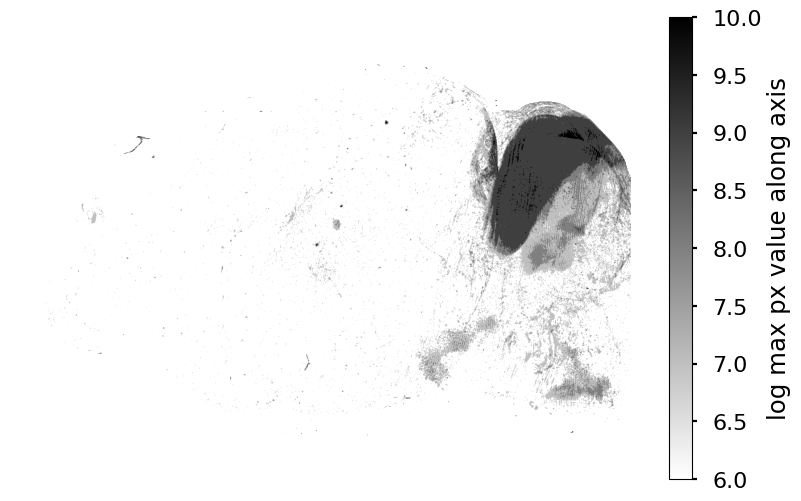

In [13]:
dataset = bt.datasets[2]
btp.generate_brain_overview(dataset, top_down=False, vmin=6, cmap='binary')
btf.save(f'{dataset.name}_sag_proj', as_type='png')

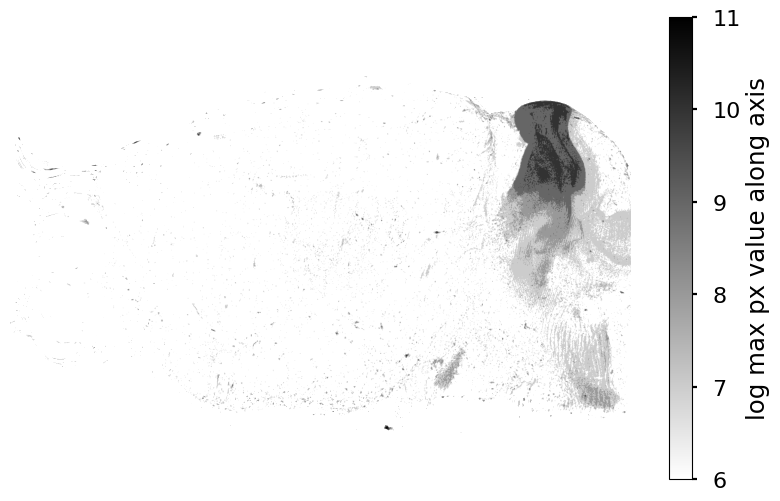

In [17]:
dataset = bt.datasets[5]
btp.generate_brain_overview(dataset, top_down=False, vmin=6, cmap='binary')
btf.save(f'{dataset.name}_sag_proj', as_type='png')